In [1]:
import ANN
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,7)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from IPython import display


In [2]:
Input = [[0,0],[0,1],[1,0],[1,1]]
target = [0,1,1,0]

In [3]:
numLayers = 3
iterations = 5000
eta = 0.3

nn1 = ANN.FNN(numLayers, Input, target, eta=eta)

#output, error = nn1.train(iterations)

Class labels:set([0, 1])
Network constructed with 3 layers, learning rate is 0.3
Layers connected


In [4]:
target = nn1.__target__

error = []
output = []
out, e = nn1.train()
error.append(e)
output.append(out)

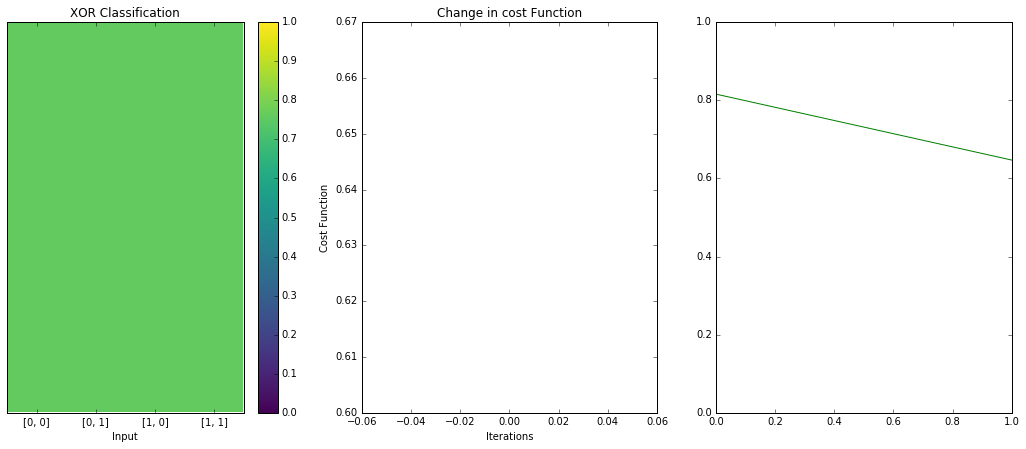

In [5]:
plt.ion()

f, ax = plt.subplots(1,3)

im = ax[0].imshow(target, interpolation = 'none', cmap='viridis', origin='lower', aspect='auto', vmin= 0., vmax = 1.)
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels([str(inp) for inp in Input])
ax[0].set_yticks([])
ax[0].set_xlabel("Input")
ax[0].set_title('XOR Classification')

f.canvas.draw()
f.colorbar(im, ax=ax[0])
plt.pause(2)

im = ax[0].imshow(out, interpolation = 'none', cmap='viridis', origin='lower', aspect='auto', vmin= 0., vmax = 1.)

cost = ax[1].plot(error, c='k')
ax[1].set_title("Change in cost Function")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Cost Function")

x = np.linspace(0,1,100)

w0, w1, w2 = nn1.hidden_layers[0].neurons[1].w
w3, w4, w5 = nn1.hidden_layers[0].neurons[2].w


ax[2].plot(x, ((-w1/w2)*x) + (w0/w2))
ax[2].plot(x, ((-w4/w5)*x) + (w3/w5))
ax[2].set_xlim((0,1))
ax[2].set_ylim((0,1))
f.canvas.draw()

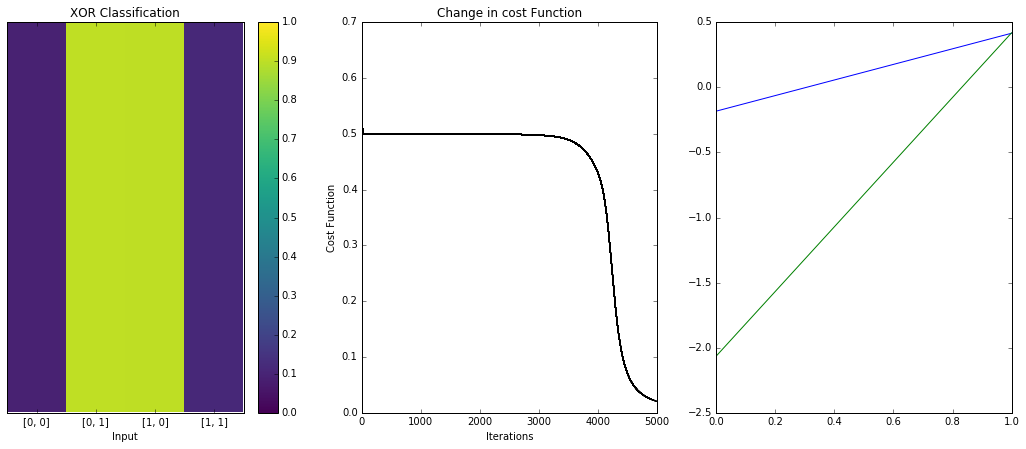

In [6]:


for i in range(iterations):
    out, e = nn1.train()
    output.append(out)
    error.append(e)
    #print("Output is {}".format(nn1.output_layer.output))
    #print(nn1.output_layer.neurons[0].w,
    #      nn1.output_layer.prev_layer.neurons[0].output,
    #      nn1.output_layer.prev_layer.neurons[1].output,
    #      nn1.output_layer.prev_layer.neurons[2].output)
    if i % 5 == 0: # Every 10th iteration
        try:
            im.set_data(out) 
            ax[1].plot(error, c='k')
            w0, w1, w2 = nn1.hidden_layers[0].neurons[1].w
            w3, w4, w5 = nn1.hidden_layers[0].neurons[2].w
            w6, w7, w8 = nn1.output_layer.neurons[0].w
            #ax[2].set_xlim((0,1))
            #ax[2].set_ylim((0,1))
            ax[2].plot(x, -((w7/w8)*(((-w1/w2)*x) + (w0/w2))) + (w6/w8))
            ax[2].plot(x, -((w7/w8)*(((-w4/w5)*x) + (w3/w5))) + (w6/w8))
            #f.canvas.draw()
            display.display(f)
            ax[2].cla()
            display.clear_output(wait=True)
            plt.pause(0.0001)
    
        except KeyboardInterrupt:
            break
plt.ioff()
plt.close()

In [7]:
print nn1.output_layer.neurons[0].w

[-2.74747349  5.97569817 -6.6250356 ]
